In [92]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,f1_score,recall_score,classification_report
np.random.seed(42)

In [93]:
data = pd.read_csv("kyphosis.csv")

In [94]:
data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [95]:
data.isna().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [96]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [97]:
data.Number.value_counts()

3     23
4     18
5     17
2     12
7      5
6      4
9      1
10     1
Name: Number, dtype: int64

In [98]:
data.Start.value_counts()

16    17
13    12
15     7
14     5
1      5
12     5
17     4
9      4
6      4
10     4
5      3
3      3
11     3
2      2
8      2
18     1
Name: Start, dtype: int64

In [99]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Kyphosis'] = label_encoder.fit_transform(data['Kyphosis'])

In [100]:
data.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [101]:
data.Kyphosis.value_counts()

0    64
1    17
Name: Kyphosis, dtype: int64

In [102]:
X = data.drop('Kyphosis',axis=1)
y = data.Kyphosis

In [103]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [104]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32

In [105]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

<Axes: >

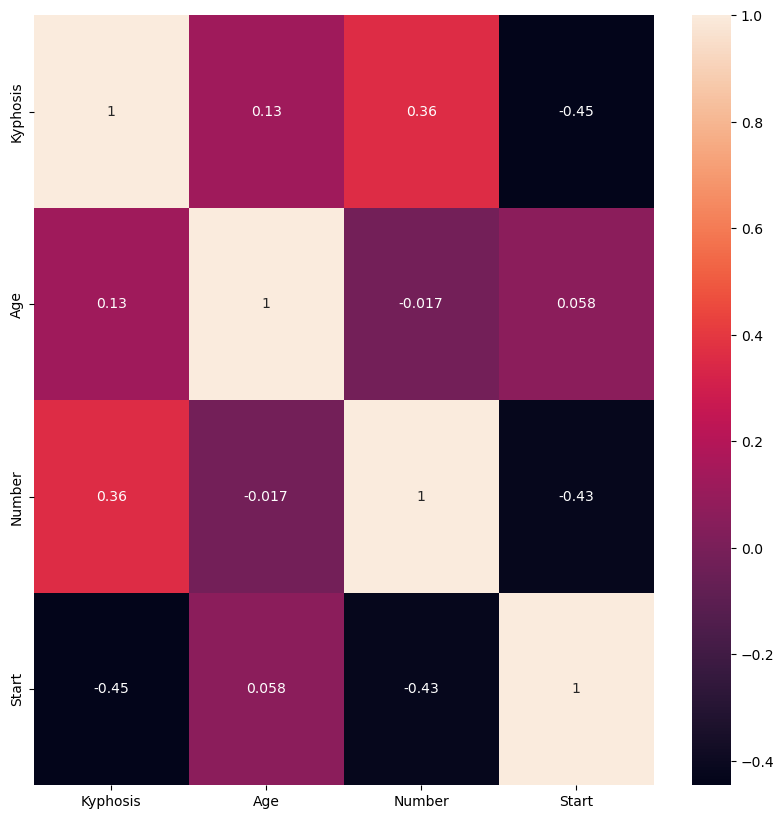

In [106]:
cor = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True)


In [107]:
from sklearn.metrics import precision_score


def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [108]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [109]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

predict = clf.predict(X_test)
evaluate_preds(y_test,predict)

Acc: 82.35%
Precision: 0.00
Recall: 0.00
F1 score: 0.00


c:\Users\Dell\Desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.82, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}

In [110]:
np.random.seed(42)
from sklearn.model_selection import GridSearchCV

grid = {'n_estimators':[400,600,800],'max_depth':[None],
        "max_features":['sqrt','log2'],
        "min_samples_split":[6],
        "min_samples_leaf":[1,2]}

gs_clf = GridSearchCV(estimator=clf,param_grid=grid,cv=5,verbose=2)

gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   2.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [400, 600, 800]},
             verbose=2)

In [111]:
np.random.seed(42)
gs_predict = gs_clf.predict(X_test)
evaluate_preds(y_test,gs_predict)

Acc: 82.35%
Precision: 0.00
Recall: 0.00
F1 score: 0.00


c:\Users\Dell\Desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.82, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}

In [112]:
import pickle
pickle_out = open("kyphosis.pkl","wb")
pickle.dump(gs_clf,pickle_out)
pickle_out.close()